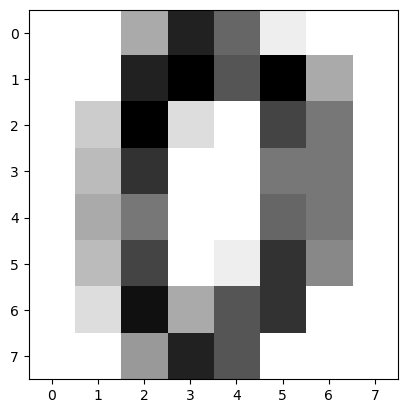

In [61]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [62]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [63]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(Xtest, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [64]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [65]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [66]:
import torch.nn as nn
import torch.nn.functional as F

In [67]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [68]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [69]:
for epoch in range(10):  
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Avg Loss: {avg_loss:.4f}")

Epoch 1, Avg Loss: 1.1499
Epoch 2, Avg Loss: 0.2678
Epoch 3, Avg Loss: 0.1561
Epoch 4, Avg Loss: 0.1078
Epoch 5, Avg Loss: 0.0951
Epoch 6, Avg Loss: 0.0671
Epoch 7, Avg Loss: 0.0607
Epoch 8, Avg Loss: 0.0447
Epoch 9, Avg Loss: 0.0318
Epoch 10, Avg Loss: 0.0301


TypeError: Invalid shape (64,) for image data

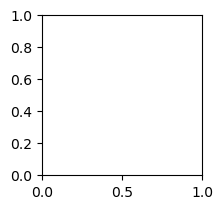

In [70]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

plt.figure(figsize=(12, 6))
for i in range(10):
    img = images[i]
    if img.ndim == 1: 
        img = img.view(8, 8)
    elif img.ndim == 3: 
        img = img.squeeze()

    plt.subplot(2, 5, i + 1)
    plt.imshow(img.cpu(), cmap='gray')
    plt.title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()